In [1]:
pip install yfinance


[*********************100%***********************]  1 of 1 completed


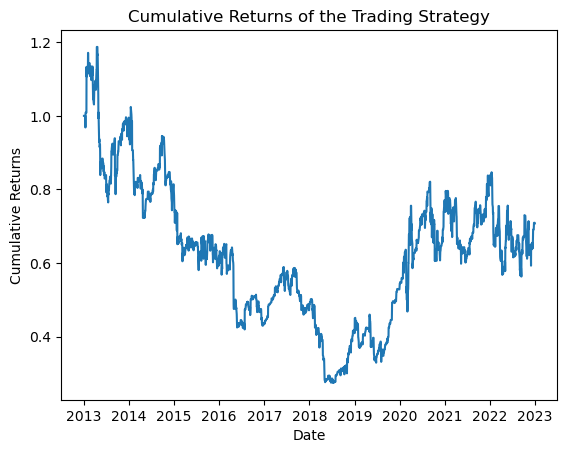

Cumulative Returns: 0.7075230193546879
Maximum Drawdown: -0.7692838984143563
Sharpe Ratio: -1.5876551086947734


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical price data
ticker = "AAPL"  # Replace "AAPL" with your desired ticker symbol
start_date = "2013-01-01"  # Replace with your desired start date
end_date = "2023-01-01"  # Replace with your desired end date
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate moving averages
data['MA_short'] = data['Close'].rolling(window=10).mean() 
data['MA_long'] = data['Close'].rolling(window=50).mean()

# Identify Double Top/Double Bottom patterns
data['Resistance'] = data['High'].rolling(window=3).max()  # Find the highest price in a 3-day window
data['Support'] = data['Low'].rolling(window=3).min()  # Find the lowest price in a 3-day window

# Define trading signals based on pattern and MA crossover
data['Signal'] = 0
data.loc[(data['High'] > data['Resistance'].shift(1)) & (data['High'] > data['Resistance'].shift(2)), 'Signal'] = -1  # Double Top sell signal
data.loc[(data['Low'] < data['Support'].shift(1)) & (data['Low'] < data['Support'].shift(2)), 'Signal'] = 1  # Double Bottom buy signal

data['MA_crossover'] = data['MA_short'] - data['MA_long']
data.loc[data['MA_crossover'] > 0, 'Signal'] += 1  # MA crossover buy signal
data.loc[data['MA_crossover'] < 0, 'Signal'] -= 1  # MA crossover sell signal

# Calculate daily returns
data['Return'] = data['Close'].pct_change()

# Apply trading signals to generate positions
data['Position'] = data['Signal'].shift()

# Calculate portfolio value and cumulative returns
data['Portfolio'] = (data['Position'] * data['Return']) + 1
data['Cumulative_Returns'] = data['Portfolio'].cumprod()

# Plot cumulative returns
plt.plot(data['Cumulative_Returns'])
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of the Trading Strategy')
plt.show()

# Calculate maximum drawdown
data['Peak'] = data['Cumulative_Returns'].cummax()
data['Drawdown'] = data['Cumulative_Returns'] / data['Peak'] - 1
max_drawdown = data['Drawdown'].min()

# Calculate Sharpe ratio
risk_free_rate = 0.03  # Adjust the risk-free rate as needed
sharpe_ratio = (data['Return'].mean() - risk_free_rate) / data['Return'].std()

# Print performance metrics
print("Cumulative Returns:", data['Cumulative_Returns'].iloc[-1])
print("Maximum Drawdown:", max_drawdown)
print("Sharpe Ratio:", sharpe_ratio)